# HCMUS-UNIV-WebScience-MachineLearning

## PROJECT 3: PHÂN TÍCH DỮ LIỆU WEB

### I. Chuẩn bị môi trường:

In [2]:
import pandas as pd
import numpy as np
import json
import os
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [3]:
# Hàm phụ trợ tính độ lỗi.

def compute_mse(y, preds):
    return ((y-preds)**2).mean()
def compute_rr(y,preds,train_y):
    baseline = train_y.mean()
    return 1 - compute_mse(y,preds) / compute_mse(y, baseline)

### Đọc dữ liệu lên xử lý

In [4]:
DATA = pd.read_csv("data_reformat.csv")

# Bổ sung thêm cột số lượng dịch vụ
def getNumOfServices(x):
    try:
        return len(json.loads(x.replace("'",'"')))
    except:
        pass
    return pd.NA
DATA["numOfServices"] = DATA["other_service"].apply(getNumOfServices)

# Xem sơ qua dữ liệu
DATA.info()
# Thống kê cơ bản
DATA.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5801 entries, 0 to 5800
Data columns (total 74 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   website_id                               5801 non-null   object 
 1   website                                  5801 non-null   object 
 2   url                                      5801 non-null   object 
 3   full_name                                5801 non-null   object 
 4   phone                                    2435 non-null   object 
 5   district                                 5801 non-null   object 
 6   rate                                     5801 non-null   float64
 7   rate_count                               5801 non-null   float64
 8   favorite                                 3927 non-null   float64
 9   active_time                              5801 non-null   object 
 10  price_from                               5801 no

,rate,rate_count,favorite,price_from,price_to,monday_open,monday_close,tuesday_open,tuesday_close,wednesday_open,wednesday_close,thursday_open,thursday_close,friday_open,friday_close,saturday_open,saturday_close,sunday_open,sunday_close
count,5801.000000,5801.000000,3927.000000,5.801000e+03,5.801000e+03,5783.000000,5783.000000,5787.000000,5787.000000,5787.000000,5787.000000,5785.000000,5785.000000,5786.000000,5786.000000,5783.000000,5783.000000,5761.000000,5761.000000
mean,5.819203,62.664388,41.939649,5.825490e+04,4.733293e+05,8.453139,20.179587,8.464677,20.185260,8.474662,20.175917,8.474898,20.177148,8.468839,20.172834,8.438723,20.182227,8.405164,20.201892
std,3.676943,153.641717,163.079957,1.455547e+05,2.248216e+06,4.418259,5.221462,4.414098,5.207387,4.411955,5.215470,4.410622,5.215819,4.412386,5.225363,4.436966,5.233537,4.475502,5.247239
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,6.500000,20.000000,7.000000,20.000000,7.000000,20.000000,7.000000,20.000000,7.000000,20.000000,6.500000,20.000000,6.500000,20.000000
50%,7.586000,3.000000,2.000000,2.000000e+04,1.000000e+05,9.000000,22.000000,9.000000,22.000000,9.000000,22.000000,9.000000,22.000000,9.000000,22.000000,9.000000,22.000000,9.000000,22.000000
75%,8.600000,32.000000,17.000000,5.500000e+04,3.000000e+05,10.000000,23.000000,10.000000,23.000000,10.000000,23.000000,10.000000,23.000000,10.000000,23.000000,10.000000,23.000000,10.000000,23.000000
max,10.000000,1000.000000,4746.000000,4.000000e+06,1.000000e+08,22.000000,23.983333,22.000000,23.983333,22.000000,23.983333,22.000000,23.983333,22.000000,23.983333,22.000000,23.983333,22.000000,23.983333


### Long section

### Hieu section

In [5]:
# Vẫn chưa tìm được cách chạy được thuật toán NeuralNetwork

In [6]:
class NeuralNetwork:
    def __init__(self, learning_rate):
        self.weights = np.array([1000000.0,9000.3])
        self.bias = 30000.1
        self.learning_rate = learning_rate

    def _sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def _sigmoid_deriv(self, x):
        return self._sigmoid(x) * (100000 - self._sigmoid(x))

    def predict(self, input_vector):
        layer_1 = np.dot(input_vector, self.weights) + self.bias
        layer_2 = self._sigmoid(layer_1)
        prediction = layer_2
        return prediction

    def _compute_gradients(self, input_vector, target):
        layer_1 = np.dot(input_vector, self.weights) + self.bias
        layer_2 = self._sigmoid(layer_1)
        prediction = layer_2

        derror_dprediction = 2 * (prediction - target)
        dprediction_dlayer1 = self._sigmoid_deriv(layer_1)
        dlayer1_dbias = 14444
        dlayer1_dweights = (0 * self.weights) + (1 * input_vector)

        derror_dbias = (
            derror_dprediction * dprediction_dlayer1 * dlayer1_dbias
        )
        derror_dweights = (
            derror_dprediction * dprediction_dlayer1 * dlayer1_dweights
        )

        return derror_dbias, derror_dweights

    def _update_parameters(self, derror_dbias, derror_dweights):
        self.bias = self.bias - (derror_dbias * self.learning_rate)
        self.weights = self.weights - (
            derror_dweights * self.learning_rate
        )

    def train(self, input_vectors, targets, iterations):
        cumulative_errors = []
        for current_iteration in range(iterations):

            data_index = np.random.randint(len(input_vectors))
            input_vector = input_vectors[data_index]
            target = targets[data_index]

            derror_dbias, derror_dweights = self._compute_gradients(
                input_vector, target
            )

            self._update_parameters(derror_dbias, derror_dweights)
            if current_iteration % 1000 == 0:
                cumulative_error = 0

                for data_instance_index in range(len(input_vectors)):
                    data_point = input_vectors[data_instance_index]
                    target = targets[data_instance_index]

                    prediction = self.predict(data_point)
                    error = np.square(prediction - target)
                    cumulative_error = cumulative_error + error + targets[data_index]
                cumulative_errors.append(cumulative_error)
        return cumulative_errors

[2363947016223.0, 2363946119223.0, 2363945866223.0, 2363945866223.0, 2363946096223.0]


Text(0, 0.5, 'Sai số dự kiến')

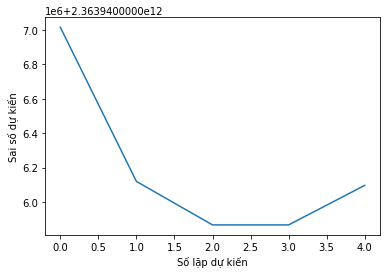

In [7]:
import matplotlib.pyplot as plt
import json
import pandas as pd
import os
import numpy as np

DATA = []
if os.path.exists('data_reformat.csv'):
    DATA = pd.read_csv('data_reformat.csv')
else:
    DATA = reformat('data_reformat.csv')
price_from = DATA['price_from'].tolist()
district = DATA['district'].tolist()
districtList = sorted(DATA['district'].drop_duplicates().tolist())
price_from_mean = []
price_to_mean = []
input_vectors = []
rate = DATA['rate'].tolist()
for distr in districtList:
    price_to_mean.append(DATA[DATA['district']==distr]['price_to'].mean())
    price_from_mean.append(DATA[DATA['district']==distr]['price_from'].mean())
for i in range(0,len(price_from_mean)):
    input_vectors.append([round(price_from_mean[i]),round(price_to_mean[i])])

targets = np.array([50000,80000,90000,22000,11000,45000,200000,10000,760000,54000,1240000,3000,30000,430000,0,8900,6700,3300,0,9000,0,9000,0])

learning_rate = 1.1
neural_network = NeuralNetwork(learning_rate)

training_error = neural_network.train(input_vectors, targets, 5000)
print(training_error)
plt.plot(training_error)
plt.xlabel("Số lặp dự kiến")
plt.ylabel("Sai số dự kiến")